In [21]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

In [12]:
def align(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]
    return hnew


In [2]:
def check(h):
	print (h)
	for i in range(len(h)):
		for j in range(len(h)):
			if h[i][0][0]==h[j][0][0] and  h[i][0][1]==h[j][0][1]:
				return 0
	return 1

In [13]:
def view(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img))


In [14]:
image=cv2.imread("WA3.jpeg")   #read in the image
print(image.shape)
image=cv2.resize(image,(360,640)) #resizing because opencv does not work well with bigger images
orig=image.copy()
# print (dtype(image))
print (type(image))
# view("img",image)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale

blurred=cv2.GaussianBlur(gray,(3,3),3)  #(5,5) is the kernel size and 0 is sigma that determines the amount of blur



edged=cv2.Canny(blurred,0,255)  #30 MinThreshold and 50 is the MaxThreshold
# view("Canny",edged)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

opening = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

(640, 360, 3)
<class 'numpy.ndarray'>


In [15]:
contours,hierarchy=cv2.findContours(opening,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model

# print(len(contours))

contours=sorted(contours,key=cv2.contourArea,reverse=True)

if len(contours)>600:
	blurred=cv2.GaussianBlur(gray,(3,3),2)
	# view("blur2",blurred)
	edged=cv2.Canny(blurred,0,255)  
	dil = cv2.dilate(edged, kernel, iterations = 10)
	# view("Canny1",dil)
	contours,hierarchy=cv2.findContours(dil,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model
contours=sorted(contours,key=cv2.contourArea,reverse=True)

In [16]:
max_=0
#the loop extracts the boundary contours of the page
for c in contours:
    # print (c)
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.01*p,True)
    print (cv2.contourArea(c))

    # print (approx,cv2.contourArea(c))
    if len(approx)<9 and cv2.contourArea(c)> 400 and len(approx)>=4:
        target=approx
        break

45688.0


In [17]:
polygon = []
poly = []
x = []
y = []
for i in approx:
    polygon.append(tuple(i[0]))
    poly.append((i[0]))
    x.append(i[0][0])
    y.append(i[0][1])


print (x,y)

[128, 128, 203, 238, 236, 179] [96, 509, 527, 508, 101, 112]


In [18]:
box = []
# box.append((min(x),min(y)))
# box.append((min(x),max(y)))
# box.append((max(x),max(y)))
# box.append((max(x),min(y)))
# print (box)

y_mean = sum(y)//len(x)
y_up = max(y)
y_down = min(y)
for val in y:
    print (val)
    if val>y_mean and y_up>val:
        y_up = val
    if val<y_mean and y_down<val:
        y_down = val 

box.append((min(x),y_down))
box.append((min(x),y_up))
box.append((max(x),y_up))
box.append((max(x),y_down))

96
509
527
508
101
112


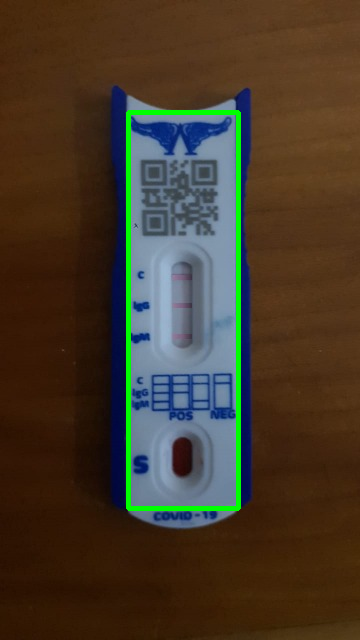

In [23]:
for i in range(len(box)-1):
    cv2.line(image,box[i],box[i+1],(0, 255, 0),3)
cv2.line(image,box[i+1],box[0],(0, 255, 0),3)
view(image)

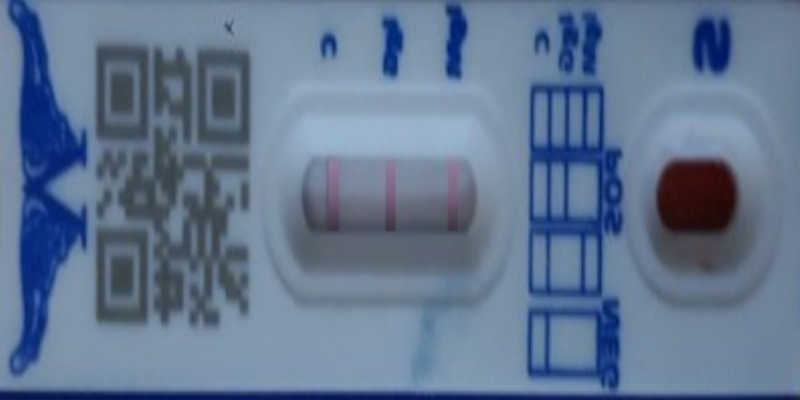

In [22]:
x =300
boxplot = []
for pt in box:
    boxplot.append(list(pt))
boxplot = np.float32(np.array(boxplot))
pts=np.float32([[0,0],[800,0],[800,400],[0,400]])  #map to 800*800 target window
# # print (approx)
# for points in list(box):
# 	orig = cv2.circle(orig, tuple(points), 3, (0,255,0), 2)
# view("dot",orig) 
op=cv2.getPerspectiveTransform(boxplot,pts)  #get the top or bird eye view effect
dst=cv2.warpPerspective(orig,op,(800,400))
view(dst)

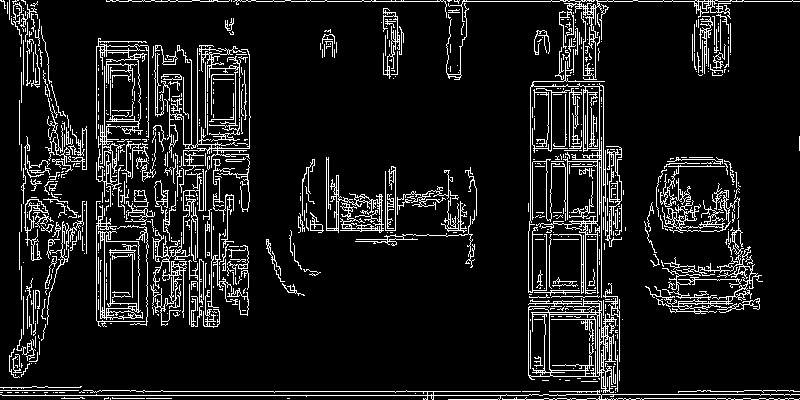

1083


In [28]:
gray=cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)  #RGB To Gray Scale
kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
im = cv2.filter2D(gray, -1, kernel)
edged=cv2.Canny(im,0,150)  #30 MinThreshold and 50 is the MaxThreshold
view(edged)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

opening = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

# view(opening)




contours,hierarchy=cv2.findContours(opening,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  #retrieve the contours as a list, with simple apprximation model

print(len(contours))